In [1]:
import numpy as np  
import pandas as pd  

In [2]:
#Python method to get the csv path
def getData(path):
    inputData = pd.read_csv(url) 
    initData=inputData
    return inputData,initData
url=  "F:\\Datasets\\Titanic\\train.csv" 
data,initData = getData(url)

uniqueId = "PassengerId"
target = "Survived"
features = ["Pclass","Sex","Age","SibSp","Parch"]
testsize=0.3
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
#and Fare to predict whether a passenger survived
#print(data.head(5))

In [3]:
if(uniqueId==""):
    uniqueId=uniqueId
    uniqueIdGenerator=np.arange(1,len(data))
    UqId=pd.DataFrame(list(uniqueIdGenerator),columns=["UniqueId"])
    #data=pd.concat([UqId,data],axis=1) 
    initData=pd.concat([UqId,data],axis=1) 
    uniqueId=initData.columns[0]
print(initData.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
#Python method for handling nan values
#Numerical columns replaced with mean
#String columns replaced with mode
from collections import Counter
def dataCleaning(inputData,features,uniqueId,target):
    updatedData =  inputData[target]   
    dataForClean=pd.DataFrame()
    for i in range(0,len(features)):
        dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[features[i]])],axis=1)
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[target])],axis=1)
    inputData=dataForClean
    for i in range(0,len(inputData.columns)):
        colName=inputData.columns[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colName != uniqueId):
            mode=Counter(inputData[colName])
            modeval= mode.most_common(1)[0][0]
            inputData[colName]= inputData[colName].replace(np.NaN, modeval)
        else:
            inputData[colName]= inputData[colName].replace(np.NaN, np.mean(inputData[colName]))

    
    return inputData,updatedData

data,updatedData=dataCleaning(data,features,uniqueId,target)
#print(data.head(10))

In [5]:
#Python method for pre-processing the data
#Categorical variables are label and one hot encoded
def dataPreProcess(inputData,target):
    from sklearn import preprocessing 
    labelencoder= preprocessing.LabelEncoder()
    onehotencoder = preprocessing.OneHotEncoder(sparse=False)
    notencoded = pd.DataFrame()
    encoded = pd.DataFrame()
    colNames=[]
    for i in range(0,len(inputData.columns)):
        colNames.append(inputData.columns[i])
        
    for i in range(0,len(colNames)):
        colName=colNames[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colNames[i] != uniqueId):
            df =  labelencoder.fit_transform(inputData[colName])
            df = np.array(inputData[colName])
            df =   df.reshape(len(df),1)
            onehot_encoded = onehotencoder.fit_transform(df)
            onehot_encoded = pd.DataFrame(onehot_encoded)
            #onehot_encoded = onehot_encoded.drop(len(onehot_encoded.columns)-1,axis=1)
            encoded=pd.concat([onehot_encoded,encoded],axis=1)       
        else:
            notencoded=  pd.concat([notencoded,inputData[colName]],axis=1)
    combinedData=pd.concat([encoded,notencoded],axis=1)
    updatedData=pd.DataFrame()
    updatedData=pd.concat([updatedData,combinedData],axis=1) 
    Y = pd.DataFrame() 
    Y = pd.DataFrame(updatedData[target])
    del updatedData[target]
    X = pd.DataFrame()
    X = updatedData
   
    return X,Y

X,Y=dataPreProcess(data,target)
print(X.head(10))
print(Y.head(10))

     0    1  Pclass        Age  SibSp  Parch
0  0.0  1.0       3  22.000000      1      0
1  1.0  0.0       1  38.000000      1      0
2  1.0  0.0       3  26.000000      0      0
3  1.0  0.0       1  35.000000      1      0
4  0.0  1.0       3  35.000000      0      0
5  0.0  1.0       3  29.699118      0      0
6  0.0  1.0       1  54.000000      0      0
7  0.0  1.0       3   2.000000      3      1
8  1.0  0.0       3  27.000000      0      2
9  1.0  0.0       2  14.000000      1      0
   Survived
0         0
1         1
2         1
3         1
4         0
5         0
6         0
7         0
8         1
9         1


In [6]:
def datasplit(X,Y,size):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=size, shuffle=False)
    return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test=datasplit(X,Y,testsize)
print(X_train.head(5))
print(X_test.head(5))
print(Y_train.head(5))
print(Y_test.head(5))

     0    1  Pclass   Age  SibSp  Parch
0  0.0  1.0       3  22.0      1      0
1  1.0  0.0       1  38.0      1      0
2  1.0  0.0       3  26.0      0      0
3  1.0  0.0       1  35.0      1      0
4  0.0  1.0       3  35.0      0      0
       0    1  Pclass   Age  SibSp  Parch
623  0.0  1.0       3  21.0      0      0
624  0.0  1.0       3  21.0      0      0
625  0.0  1.0       1  61.0      0      0
626  0.0  1.0       2  57.0      0      0
627  1.0  0.0       1  21.0      0      0
   Survived
0         0
1         1
2         1
3         1
4         0
     Survived
623         0
624         0
625         0
626         0
627         1


In [7]:
def decsiontreeClassification(X_train, X_test, Y_train, Y_test):
    from sklearn import tree
    regressor = tree.DecisionTreeRegressor()
    regressor.fit(X_train,Y_train)        
    predictions = np.ceil(regressor.predict(X_test))
    from sklearn import metrics       
    cm = metrics.confusion_matrix(Y_test, predictions)
    return predictions,cm

In [8]:
predictions,cm=decsiontreeClassification(X_train, X_test, Y_train, Y_test)
n=len(data)
p=len(features)
output1=pd.DataFrame(list(Y_test[target]),columns=["Actual"])
output2=pd.DataFrame(list(predictions),columns=["Predicted"])
prednactual=pd.concat([output1,output2],axis=1)
testStart=initData[uniqueId][len(X_train):len(data)]
testStart=pd.DataFrame(testStart,columns=[uniqueId])
testStart.reset_index(drop=True, inplace=True)
prednactual.reset_index(drop=True, inplace=True)
prednactualfinal=pd.concat([testStart,prednactual],axis=1)
truePositive = cm[0,0]
falsePositive= cm[1,0]
trueNegative= cm[1,1]
falseNegative=cm[0,1]
accuracy= (truePositive + trueNegative) / (truePositive+falsePositive+trueNegative+falseNegative)
precision= (truePositive) /(truePositive + falsePositive)
recall=   (truePositive) /(truePositive+falseNegative)
f1score= (2*precision*recall) / (precision+recall)

print(".........InputData............")
print(initData.head(5))

print(".............Unique and target variables..............")
print("UniqueId: ",uniqueId)
print("Target variable: ",target)

print(".........Input Data............")
print(data.head(5))


print(".........Output Data............")
print(prednactualfinal.head(5))



.........InputData............
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [9]:
print(".............Evaluation metrics..............")
print("Accuracy: ",accuracy)
print("cm: ",cm)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1Score: ",f1score)

.............Evaluation metrics..............
Accuracy:  0.6044776119402985
cm:  [[82 90]
 [16 80]]
Precision:  0.8367346938775511
Recall:  0.47674418604651164
F1Score:  0.6074074074074074


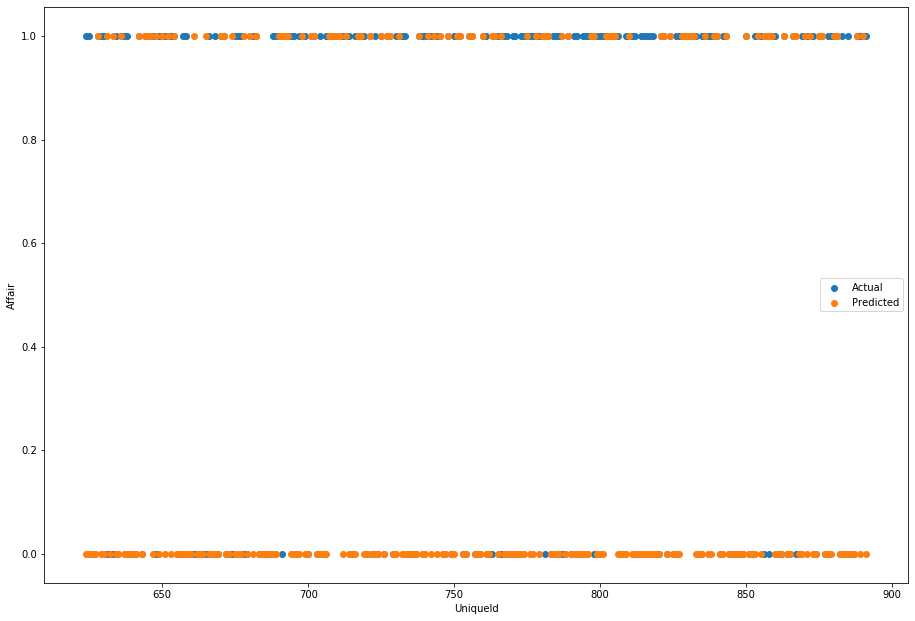

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_axes([0,0,2,2])
y_axis_pred = prednactualfinal["Predicted"]
y_axis_actual = prednactualfinal["Actual"]
x_axis= prednactualfinal[uniqueId]
ax.scatter(x_axis,y_axis_pred)
ax.scatter(x_axis,y_axis_actual)
ax.set_xlabel("UniqueId")
ax.set_ylabel("Affair")
ax.legend(labels=['Actual', 'Predicted'])
plt.show()